In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle


# Tensorflow NLP kit(only so much for our needs)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer

In [286]:
dataku = pd.read_csv("train_preprocess.tsv", sep='\t', header=None)
dataku.columns = [ "kalimat", "label"]
dataku.head()
# dataset yang digunakan dari BInar link test train_preprocess.tsv

,kalimat,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [287]:
#Pre-Processing Data
# Mengubah Label String menjadi Integer

cleanup_nums ={"label" :{"positive":1,"neutral":0 ,"negative":-1}}
datayuk = dataku.replace (cleanup_nums)
datayuk.head()

,kalimat,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0
2,lokasi strategis di jalan sumatera bandung . t...,1
3,betapa bahagia nya diri ini saat unboxing pake...,1
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1


In [288]:
print ("Total Jumlah data:" , datayuk.shape[0], 'data\n')
print ("terdiri dari{label}:")
print ("--[-1]:Label Negative:\t" , datayuk[datayuk.label == -1].shape[0], 'data\n')
print ("--[0]:Label Neutral:\t" , datayuk[datayuk.label == 0].shape[0], 'data\n')
print ("--[1]:Label Positive:\t" , datayuk[datayuk.label == 1].shape[0], 'data\n')

Total Jumlah data: 11000 data

terdiri dari{label}:
--[-1]:Label Negative:	 3436 data

--[0]:Label Neutral:	 1148 data

--[1]:Label Positive:	 6416 data



In [323]:
#membuat fungsi text_preprocessing untuk melakukan preprocessing data.
#melihat waktu komputasi pada saat melakukan text preprocessing Membaca Dataset

import re

def text_preprocessing(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text ) #Menghapus URL
    text = re.sub(r'[-+]?[0-9+]','', text )    #Menghapus Angka
    text = re.sub(r'[^\w\s]','', text) # menghapus karakter tanda baca
    text = text.strip() # menghapus whitespaces
    return text

In [290]:
#waktu komputasi untuk text preprocessing
%time datayuk['clean_kalimat'] = datayuk['kalimat'].apply(text_preprocessing) 

Wall time: 210 ms


In [291]:
datayuk.head()

,kalimat,label,clean_kalimat
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0,mohon ulama lurus dan k mmbri hujjah partai ap...
2,lokasi strategis di jalan sumatera bandung . t...,1,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,1,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1,duh jadi mahasiswa jangan sombong dong kasih...


In [292]:
#Ekstrasi Fitur

# Word2Vec
# Mengimport library gensim
# Melakukan Tokenize kata pada setiap kalimat
# Mendefiniskan parameter training dalam Word2Vec

import gensim

#cek version gensimnya
gensim.__version__

'4.1.2'

In [324]:
# melakukan tokenize data pada setiap kalimat
# tujuannya :sebelumya kalimat menjadi kata

def tokenization(text):
    text = re.split('\W+',text)
    return text

sentences = datayuk['clean_kalimat'].apply(lambda x: tokenization(x.lower()))
sentences

0        [warung, ini, dimiliki, oleh, pengusaha, pabri...
1        [mohon, ulama, lurus, dan, k, mmbri, hujjah, p...
2        [lokasi, strategis, di, jalan, sumatera, bandu...
3        [betapa, bahagia, nya, diri, ini, saat, unboxi...
4        [duh, jadi, mahasiswa, jangan, sombong, dong, ...
                               ...                        
10995                                      [tidak, kecewa]
10996    [enak, rasa, masakan, nya, apalagi, kepiting, ...
10997     [hormati, partaipartai, yang, telah, berkoalisi]
10998    [pagi, pagi, di, tol, pasteur, sudah, macet, p...
10999    [meskipun, sering, belanja, ke, yogya, di, ria...
Name: clean_kalimat, Length: 11000, dtype: object

In [294]:
# mendefiniskan parameter training word2vec


EMBEDDING_SIZE =  100 # dimensi word vector/ neuron pada projection (hidde)layer
WINDOWS_SIZE = 5 # WINDOWS SIZE JARAK MAKSIMUM ANTARA KATA SAAT INI DANN YANG DIPREDIKSI DALAM SEBUAH
MIN_WORD = 1 # MODEL AKAN MENGABAIKAN  SEMUA KATA DENGAN FREKUENSI TOTAL LEBIH RENDAR DARI INI (OPSIONAL)
EPOCH = 10 # JUMLAH ITERASI (EPOCH)
SG = 1 # STRATEGI ALGORITH PELATIHAN : 1 UNTUK SKIP GRAIM , 0 UNTUK CBOW
NEGATIVE = 5 # NEGATIVE SAMPLING JIKA 0 NEGATIVE SAMPLING TIDAK DIGUNAKAN


In [ ]:
# MELIHAT KOMPUTASI WAJTU SAAT PROSES TRAINING DALAM WORD2VEC
#MENYIMPAN WORD2VEC SEBAGAI FULL MODE. (MODE_WORD2VEC.SAVE)
# MENYIMPAN KATA DAN TRAINED EMBEDDING DI WORD2VEC SEBAGAI WORD VECTORS (WORD2VEC_WORD_VECTOR.SAVE)
# MENCARI NULAI VEKTOR DARI KATA 'BAHAGIA' DI DALAM MODEL WORD2 VEC ( MODEL_WORD2VEC.WV)

In [295]:
%%time

# proses training Word2ve
from gensim.models import Word2Vec , FastText , KeyedVectors
#model_word2veb =Word2Vec(sentences,size=EMBEDDING_SIZE,sg = SG, window=WINDOWS_SIZE, min_count=MIN_WORD, negative =NEGATIVE , iter =EPOCH)
model_word2veb =Word2Vec(sentences ,vector_size =100 ,window=WINDOWS_SIZE, min_count=MIN_WORD, negative =NEGATIVE ,epochs =EPOCH)


Wall time: 2.73 s


In [296]:
# save word2vec sebagai model
model_word2veb.save("myvec-word2vec-100.model")

In [297]:
# save word2vec sebagai wordvectors , hanya menyimpan kata dan trained embeddingnya

word2vec_word_vectors = model_word2veb.wv
word2vec_word_vectors.save("myvec-word2vec-100.model")

model_word2veb.wv 

In [298]:
#cari nilai vektor dari kata tertentu
model_word2veb.wv['bahagia']

array([-0.19654095,  0.27746454, -0.11468802, -0.10599843, -0.00768241,
       -0.37184623,  0.1411884 ,  0.42671654, -0.19538248,  0.0464864 ,
       -0.10553358, -0.42841285,  0.03129089,  0.01346174, -0.04841951,
       -0.16303004,  0.14322625, -0.19404699, -0.03724009, -0.378252  ,
        0.2801851 , -0.11110275,  0.09134837, -0.04813251, -0.02134787,
        0.00794789,  0.07624791, -0.01943138, -0.3464272 ,  0.04543546,
        0.0452478 , -0.14627719,  0.00683914, -0.05124352, -0.13623525,
        0.21137701,  0.06346337, -0.19134504, -0.08469299, -0.26663023,
        0.03966012, -0.04834016, -0.02860345,  0.08334951,  0.06333207,
       -0.11112101, -0.17443728, -0.15854903,  0.04261748, -0.1418572 ,
        0.01966451, -0.17106777,  0.03175291,  0.0328647 ,  0.10252616,
       -0.04627686,  0.15816621, -0.19770141, -0.28076494, -0.07696132,
       -0.07221687, -0.1738924 ,  0.03408666, -0.04506777, -0.3730356 ,
        0.246436  ,  0.2081564 ,  0.15544891, -0.27281347,  0.14

In [299]:
word2vec_word_vectors['bahagia']

array([-0.19654095,  0.27746454, -0.11468802, -0.10599843, -0.00768241,
       -0.37184623,  0.1411884 ,  0.42671654, -0.19538248,  0.0464864 ,
       -0.10553358, -0.42841285,  0.03129089,  0.01346174, -0.04841951,
       -0.16303004,  0.14322625, -0.19404699, -0.03724009, -0.378252  ,
        0.2801851 , -0.11110275,  0.09134837, -0.04813251, -0.02134787,
        0.00794789,  0.07624791, -0.01943138, -0.3464272 ,  0.04543546,
        0.0452478 , -0.14627719,  0.00683914, -0.05124352, -0.13623525,
        0.21137701,  0.06346337, -0.19134504, -0.08469299, -0.26663023,
        0.03966012, -0.04834016, -0.02860345,  0.08334951,  0.06333207,
       -0.11112101, -0.17443728, -0.15854903,  0.04261748, -0.1418572 ,
        0.01966451, -0.17106777,  0.03175291,  0.0328647 ,  0.10252616,
       -0.04627686,  0.15816621, -0.19770141, -0.28076494, -0.07696132,
       -0.07221687, -0.1738924 ,  0.03408666, -0.04506777, -0.3730356 ,
        0.246436  ,  0.2081564 ,  0.15544891, -0.27281347,  0.14

In [300]:
# menemukan kata kata teratas yang paling mirip dari kata tertentu
# menghitung kesamaa dari vektor bobot proyekis dari kata kata yang diberikan dan vektor untuk setiap kata dala model

word2vec_word_vectors.most_similar('bahagia')



[('baca', 0.9388450980186462),
 ('galau', 0.9370220303535461),
 ('emosi', 0.9182422161102295),
 ('iri', 0.9130538702011108),
 ('meng', 0.9029670357704163),
 ('bung', 0.8990241885185242),
 ('maksud', 0.8978148698806763),
 ('argumen', 0.8977999091148376),
 ('bakalan', 0.8960261940956116),
 ('saudarasaudara', 0.8960250020027161)]

In [329]:

words = list(model_word2veb.wv.index_to_key)
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 17416


In [330]:
W2V_SIZE = 228

AttributeError: type object 'Tokenizer' has no attribute 'items'

In [301]:
# kata kata yang ingin kita plot vektornya
#membuat kata-kata yang ingin kita plot vektornya .(word_list)

world_list = ['marah','emosi' , 'masalah' , 'bersyukur','hadiah' ,'sedih' ,'selamat' ,'takut'  ,'lari' ,'akrab' ]

#mebuat daftar vektro dari kata kata tersebut ( word_vectors)
# daftar vektor dari kata kata tersebut
#word_vectors = np.array ([model_word2veb.wv[x] for x in world_list] )
word_vectors = np.array ([word2vec_word_vectors[x] for x in world_list] )
print(word_vectors)

[[-1.58158287e-01  1.34118521e+00 -1.50367558e+00 -4.82849002e-01
  -7.24563479e-01 -9.37424719e-01  7.96808839e-01  1.14370108e+00
  -3.06456983e-01  1.15552425e+00 -7.03285813e-01 -8.84243965e-01
  -9.68105569e-02 -8.66374671e-01 -7.19245449e-02 -6.10130847e-01
   3.15339535e-01 -1.06699836e+00  7.78773785e-01 -1.36547828e+00
   9.39096093e-01 -2.53240347e-01  4.73496912e-04 -4.05171007e-01
  -1.92060009e-01 -5.29533744e-01  2.10350037e-01 -7.63972342e-01
  -9.80108976e-01 -5.00337481e-01  4.68186647e-01 -2.29583964e-01
  -1.78031117e-01 -4.60038573e-01 -6.60640001e-01  6.62479162e-01
   5.61869740e-01 -2.95801252e-01 -5.80724716e-01 -1.09057093e+00
   1.02571398e-01 -5.27698338e-01 -7.60165155e-01  4.59526956e-01
  -3.50120068e-02 -3.87496293e-01 -1.20878839e+00 -2.35596940e-01
   2.87149429e-01 -8.00054550e-01 -5.28522357e-02 -9.81939137e-01
  -2.18409315e-01  4.85054642e-01  1.29827464e+00 -1.17285335e+00
   9.08110678e-01 -1.03025782e+00 -7.94430077e-01 -3.34172845e-01
  -6.55805

In [302]:
# reduksi dimensi vektor ke 2D menggunakan PCA
#print (sklearn.__version__)
from sklearn.decomposition import PCA , KernelPCA

# melakukan reduksi dimensi vektor ke 2D menggunakan PCA (red_word_vectors)

dimred = PCA ( n_components = 2, copy = False , whiten = True)
red_word_vectors = dimred.fit_transform(word_vectors)


In [303]:
# Lihat vektor hasil PCA dari 5 dimensi menjadi 2 dimensi

red_word_vectors

array([[ 2.595562  , -0.7816087 ],
       [-0.25866082, -0.12611511],
       [ 0.35777768,  2.288336  ],
       [-0.5884117 , -0.02346473],
       [-0.5754163 , -0.3622404 ],
       [ 0.13799882,  0.14900751],
       [-0.1336455 , -1.305458  ],
       [ 0.10230823,  0.9724498 ],
       [-0.781893  , -0.45053756],
       [-0.85562   , -0.36036792]], dtype=float32)

In [304]:
#membuat fungsi plot (def plot) dimana hasil  plot-nya berisikan red_word_vectors dan word_list

def plot ( datas, labels, fc ="y"):
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(datas[:,0] , datas [:,1] , marker ='o')
    for label,x,y in zip(labels,datas[:,0],datas[:,1]):
       plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))  

    plt.show()    
    


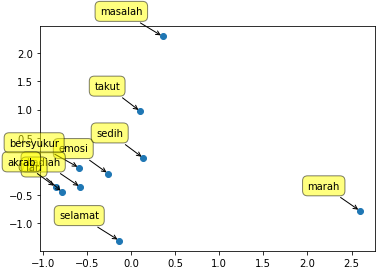

In [305]:
plot ( red_word_vectors,world_list)

# penjelasan word2vec
#https://medium.com/@afrizalfir/mengenal-word2vec-af4758da6b5d

In [306]:

##### INI HANYA SAMPAI YANG PLOT LAINNYA BLUM BISA

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 100, 100)          10000000  
                                                                 
 lstm_8 (LSTM)               (None, 64)                42240     
                                                                 
 dense_18 (Dense)            (None, 3)                 195       
                                                                 
Total params: 10,042,435
Trainable params: 10,042,435
Non-trainable params: 0
_________________________________________________________________
None


In [307]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [317]:
# create model RNN


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Dropout

from tensorflow.keras.callbacks import EarlyStopping

# buat embedding layer yang menerima panjang dicitonary hasil tokenisai
embed_dim = 100
units = 64
max_features = 100000

model_RNN = Sequential()

# input_lenght disini saya tulis 100, karena belum tau yang bener bagaimana
model_RNN.add(Embedding(max_features, embed_dim, input_length =X.shape[1]))
model_RNN.add(SimpleRNN(units, dropout=0.2))
model_RNN.add(Dense(3,activation='softmax'))
model_RNN.compile(loss = 'binary_crossentropy',metrics = ['accuracy'])
print(model_RNN.summary())


model_LSTM.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])
#optimizer dihapus karena ga paham fugsinyanya

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 77, 100)           10000000  
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 64)                10560     
                                                                 
 dense_26 (Dense)            (None, 3)                 195       
                                                                 
Total params: 10,010,755
Trainable params: 10,010,755
Non-trainable params: 0
_________________________________________________________________
None


In [349]:
# create model LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.callbacks import EarlyStopping

# buat embedding layer yang menerima panjang dicitonary hasil tokenisai
embed_dim = 100
units = 64
max_features = 100000

model_LSTM = Sequential()

# input_lenght disini saya tulis 100, karena belum tau yang bener bagaimana
model_LSTM.add(Embedding(max_features, embed_dim, input_length =100))
model_LSTM.add(LSTM(units, dropout=0.2))
model_LSTM.add(Dense(3,activation='softmax'))
model_LSTM.compile(loss = 'binary_crossentropy',metrics = ['accuracy'])
print(model_LSTM.summary())



#optimizer dihapus karena ga paham fugsinyanya

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 100, 100)          10000000  
                                                                 
 lstm_19 (LSTM)              (None, 64)                42240     
                                                                 
 dense_33 (Dense)            (None, 3)                 195       
                                                                 
Total params: 10,042,435
Trainable params: 10,042,435
Non-trainable params: 0
_________________________________________________________________
None


In [350]:
model_LSTM.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Epoch 1/10


ValueError: in user code:

    File "C:\Users\wahyu\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\wahyu\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\wahyu\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\wahyu\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\wahyu\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\wahyu\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_30" is incompatible with the layer: expected shape=(None, 100), found shape=(10, 77)


In [351]:
plt.figure(figsize=(10,5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')
plt.show()
# History for loss
plt.figure(figsize=(10,5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.suptitle('Accuracy and loss for second model')
plt.show()

TypeError: 'History' object is not subscriptable

<Figure size 720x360 with 0 Axes>